# Infinite-dimensional setting

In [1]:
import numpy as np
import scipy.sparse as sparse
import scipy.sparse.linalg as sla
import matplotlib.pyplot as plt
import sys
import scipy.linalg as la

In [2]:
def compute_diffusion_matrix(K):

    dt = 1/(K-1)

    A = sparse.diags([1, -1], offsets = [0, 1], shape=(K,K))
    A = sparse.csr_matrix(A + A.T)
    A[0, 0]  = 1
    A[-1, -1] = 1

    A /= dt
    
    return A

def compute_mass_matrix(K):
    dt = 1/(K-1)

    M = sparse.diags(np.array([2, 1])/6, offsets=[0, 1], shape = (K, K))
    M = sparse.csr_matrix(M + M.T)
    M[0, 0] /= 2
    M[-1,-1] /= 2
    M *= dt

    return M

In [3]:
n_steps = 10
dt = 1/(n_steps-1)
scale = 1
sigma_g = 100

stiffness_orig = compute_diffusion_matrix(n_steps)
mass_orig = compute_mass_matrix(n_steps)

K = sparse.csr_matrix((n_steps+2,n_steps+2))
K[1:-1, 1:-1] = scale * stiffness_orig + mass_orig
K[0, 0] = 1
K[1, 0] = 1
K[-1, -1] = scale
K[-2, -1] = -scale

M = sparse.csr_matrix((n_steps+2,n_steps+2))
M[1:-1, 1:-1] = mass_orig
M[0, 0] = sigma_g**2
M[-1, -1] = sigma_g**2

/Users/nicole/anaconda3/envs/m2dt_oed_FEniCS/lib/python3.10/site-packages/scipy/sparse/_index.py:116: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
/Users/nicole/anaconda3/envs/m2dt_oed_FEniCS/lib/python3.10/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [4]:
state = np.linspace(0, 1, n_steps)
state = state**2
v = np.hstack([(state[1]-state[0])/dt, state, (state[-1]-state[-2])/dt])

Kv = K @ v
yolo = sla.spsolve(M, Kv)

In [5]:
yolo.T @ Kv

2.9632920983868805

In [29]:
def noisenorm2(n_steps):
    dt = 1/(n_steps-1)
    scale = 1
    sigma_g = 100

    stiffness_orig = compute_diffusion_matrix(n_steps)
    mass_orig = compute_mass_matrix(n_steps)

    K = sparse.csr_matrix((n_steps+2,n_steps+2))
    K[1:-1, 1:-1] = scale * stiffness_orig + mass_orig
    K[0, 0] = 1
    K[1, 0] = scale
    K[-1, -1] = 1
    K[-2, -1] = -scale

    M = sparse.csr_matrix((n_steps+2,n_steps+2))
    M[1:-1, 1:-1] = mass_orig
    M[0, 0] = sigma_g**2
    M[-1, -1] = sigma_g**2
    
    state = np.linspace(-1, 1, n_steps)
    state = state**3
    v = np.hstack([(state[1]-state[0])/dt, state, (state[-1]-state[-2])/dt])

    Kv = K @ v
    yolo = sla.spsolve(M, Kv)
    return yolo.T @ Kv

In [30]:
steps_test = np.arange(10, 1000, 10)
vals_test = np.zeros(steps_test.shape[0])

for i in range(steps_test.shape[0]):
    vals_test[i] = noisenorm2(n_steps = steps_test[i])


/Users/nicole/anaconda3/envs/m2dt_oed_FEniCS/lib/python3.10/site-packages/scipy/sparse/_index.py:116: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
/Users/nicole/anaconda3/envs/m2dt_oed_FEniCS/lib/python3.10/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


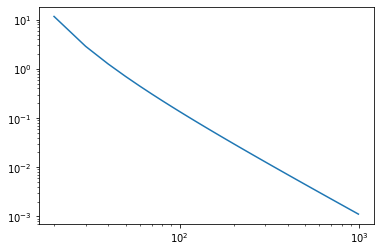

In [31]:
plt.loglog(steps_test[1:], np.abs(vals_test[1:]-vals_test[:-1]))

In [6]:
please stop here

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1680074362.py, line 1)

In [ ]:
reformat = sparse.csr_matrix((n_steps+2,n_steps))
reformat[1:-1, :] = sparse.eye(n_steps)
reformat[0, 0] = -1/dt
reformat[0, 1] = 1/dt
reformat[-1, -2] = -1/dt
reformat[-1, -1] = 1/dt

In [ ]:
reformat.toarray()

In [ ]:
please stop here

In [ ]:
def sparse_cholesky(A): # The input matrix A must be a sparse symmetric positive-definite.
  
    n = A.shape[0]
    LU = sla.splu(A,diag_pivot_thresh=0) # sparse LU decomposition
  
    if ( LU.U.diagonal() > 0 ).all(): # check the matrix A is positive definite.
        Pr = sparse.csc_matrix((np.ones(n_steps), (LU.perm_r, np.arange(n_steps))))
        return Pr @ LU.L.dot( sparse.diags(LU.U.diagonal()**0.5) )
    else:
        sys.exit('The matrix is not positive definite')

In [ ]:
def compute_diffusion_matrix(K):

    dt = 1/(K-1)

    A = sparse.diags([1, -1], offsets = [0, 1], shape=(K,K))
    A = sparse.csr_matrix(A + A.T)
    A[0, 0]  = 1
    A[-1, -1] = 1

    A /= dt
    
    return A

def compute_diffusion_matrix_Neumann(K):

    dt = 1/(K-1)

    A = sparse.diags([1, -1], offsets = [0, 1], shape=(K,K))
    A = sparse.csr_matrix(A + A.T)
    A[0, 0]  = 1
    A[-1, -1] = 1
    
    A[0, 0] -= 1
    A[0, 1] += 1
    
    A[-1, -1] += 1
    A[-1, -2] -= 1

    A /= dt
    
    return A

def compute_Neumann_BK(K):

    test = sparse.csr_matrix((K,K))
    test[0,0] = +1
    test[-1, -1] = -1
    
    return test

def compute_diffusion_matrix_Dirichlet(K):

    dt = 1/(K-1)

    A = sparse.diags([1, -1], offsets = [0, 1], shape=(K,K))
    A = sparse.csr_matrix(A + A.T)

    A[0, :] = 0
    A[-1, :] = 0
    A[:, 0] = 0
    A[:, -1] = 0

    A /= dt
    
    A[0, 0] = 1
    A[-1, -1] = 1
    
    return A

def compute_mass_matrix(K):
    dt = 1/(K-1)

    M = sparse.diags(np.array([2, 1])/6, offsets=[0, 1], shape = (K, K))
    M = sparse.csr_matrix(M + M.T)
    M[0, 0] /= 2
    M[-1,-1] /= 2
    M *= dt

    return M

def compute_mass_matrix_Dirichlet(K):
    dt = 1/(K-1)

    M = sparse.diags(np.array([2, 1])/6, offsets=[0, 1], shape = (K, K))
    M = sparse.csr_matrix(M + M.T)
    M[0, 0] /= 2
    M[-1,-1] /= 2
    M *= dt
    
    M[0, :] = 0
    M[:, 0] = 0
    M[-1, :] = 0
    M[:, -1] = 0

    return M

## Uncertain Neumann boundary conditions for noise model

In [ ]:
n_steps = 10000
dt = 1/(n_steps-1)
A = compute_diffusion_matrix_Neumann(n_steps)
M = compute_mass_matrix(n_steps)

K = A + M

In [ ]:
v = np.linspace(0, 1, n_steps)

Kv = K@v

yolo = sla.spsolve(M, Kv)
print(Kv.T @ yolo)

In [ ]:
Kv

In [ ]:
please stop here

## Dirichlet boundary conditions for noise model

In [ ]:
n_steps = 10
dt = 1/(n_steps-1)
A = compute_diffusion_matrix_Dirichlet(n_steps)
M = compute_mass_matrix(n_steps)
M_D = compute_mass_matrix_Dirichlet(n_steps)

K = 0.01*A + M_D
K[0, 0] = 1
K[-1, -1] = 1

# M = M[1:-1, :]
# M = M[:, 1:-1]

In [ ]:
v = np.linspace(0, 1, n_steps)

Kv = K@v
#Kv = Kv[1:-1]

yolo = sla.spsolve(M, Kv)
print(Kv.T @ yolo)

In [ ]:
please stop here

In [ ]:
n_steps = 100
dt = 1/(n_steps-1)
A = compute_diffusion_matrix_Dirichlet(n_steps)
M = compute_mass_matrix(n_steps)
K = (0.01*A + compute_mass_matrix_Dirichlet(n_steps))

In [ ]:
v = np.linspace(0, 1, n_steps)

Kv = K@v
yolo = sla.spsolve(M, Kv)
print(Kv.T @ yolo)

In [ ]:
Kv

In [ ]:
yolo

## older test code below

In [ ]:
n_steps = 10000
dt = 1/(n_steps-1)
A = compute_diffusion_matrix(n_steps)
M = compute_mass_matrix(n_steps)
K = (0.01*A + M)

In [ ]:
#v = np.ones((n_steps,))
#v = np.random.normal(size=(n_steps,))

v = np.linspace(0, 1, n_steps)
#v = v**2
#v = (v**2)*(v-1)**2

Kv = K@v
#Kv[0] = 0
#Kv[-1] = 0
yolo = sla.spsolve(M, Kv)

# Mv = M@v
# yolo = sla.spsolve(K, Mv)

In [ ]:
Kv.T @ yolo

In [ ]:
Kv[:5]

In [ ]:
Kv[-5:]

In [ ]:
yolo[:5]

In [ ]:
A.toarray() * dt

In [ ]:
Chol = sparse_cholesky(M)

In [ ]:
sample = np.random.normal(size=(n_steps, 5))
sample = sla.spsolve(K, Chol @ sample)

In [ ]:
for i in range(5):
    plt.plot(sample[:, i])

In [ ]:
sample.shape

**welcome back!**
Next steps:
- Check that noise-norm for measurements indeed converges for `dt` towards 0
- choose scaling factors for reasonable signal to noise ratio
- filter interpretation?

In [ ]:
LU = sla.splu(M, diag_pivot_thresh=1000)

In [ ]:
LU.perm_r

In [ ]:
LU.U.diagonal()

In [ ]:
test = LU.L.dot( sparse.diags(LU.U.diagonal()**0.5) )

In [ ]:
test.toarray() @ test.toarray().T

In [ ]:
M.toarray()

In [ ]:
M.toarray()

In [ ]:
Pr = sparse.csc_matrix((np.ones(n_steps), (LU.perm_r, np.arange(n_steps))))
Pc = sparse.csc_matrix((np.ones(n_steps), (np.arange(n_steps), LU.perm_c)))

Pr.T @ (LU.L @ LU.U).toarray() @ Pc.T

In [ ]:
Pr @ M.toarray() @ Pc

In [ ]:
(LU.L @ LU.U).toarray()

In [ ]:
C = Pr.T @ LU.L @ sparse.diags(LU.U.diagonal()**0.5)

In [ ]:
(C @ C.T).toarray()

In [ ]:
(LU.U.T @ LU.U).toarray()

In [ ]:
LU.perm_r

In [ ]:
LU.perm_c

In [ ]:
help(LU)

In [ ]:
M.toarray()

In [ ]:
U, sigma, V = la.svd(M.toarray())

In [ ]:
sigma

In [ ]:
eigvals, eigvecs = la.eig(M.toarray())

In [ ]:
eigvals

In [ ]:
K @ v

In [ ]:
Kv[:4]

In [ ]:
K[0, :3].toarray()

In [ ]:
K[1, :3].toarray()

In [ ]:
K[0, :3].toarray()

In [ ]:
K[1, :3].toarray()

In [ ]:
K[0, :3] @ v[:3]

In [ ]:
K[1, :3] @ v[:3]

In [ ]:
v[:3]

In [ ]:
M[1, :3].toarray()

In [ ]:
M[0, :3].toarray()

In [ ]:
dt = 1/(n_steps-1)